# Exploratoy Data Analysis (EDA) for Credit Risk Engine

Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We loadd the dataset we cleaned at "data_ingestion.ipynb" notebook and ddefine the color palette to use on visualizations

In [2]:
df = pd.read_csv('../data/credit_risk_cleaned.csv')

sns.set_palette("Set2")

We start looking for relevant features by checking their correlation with the target variable

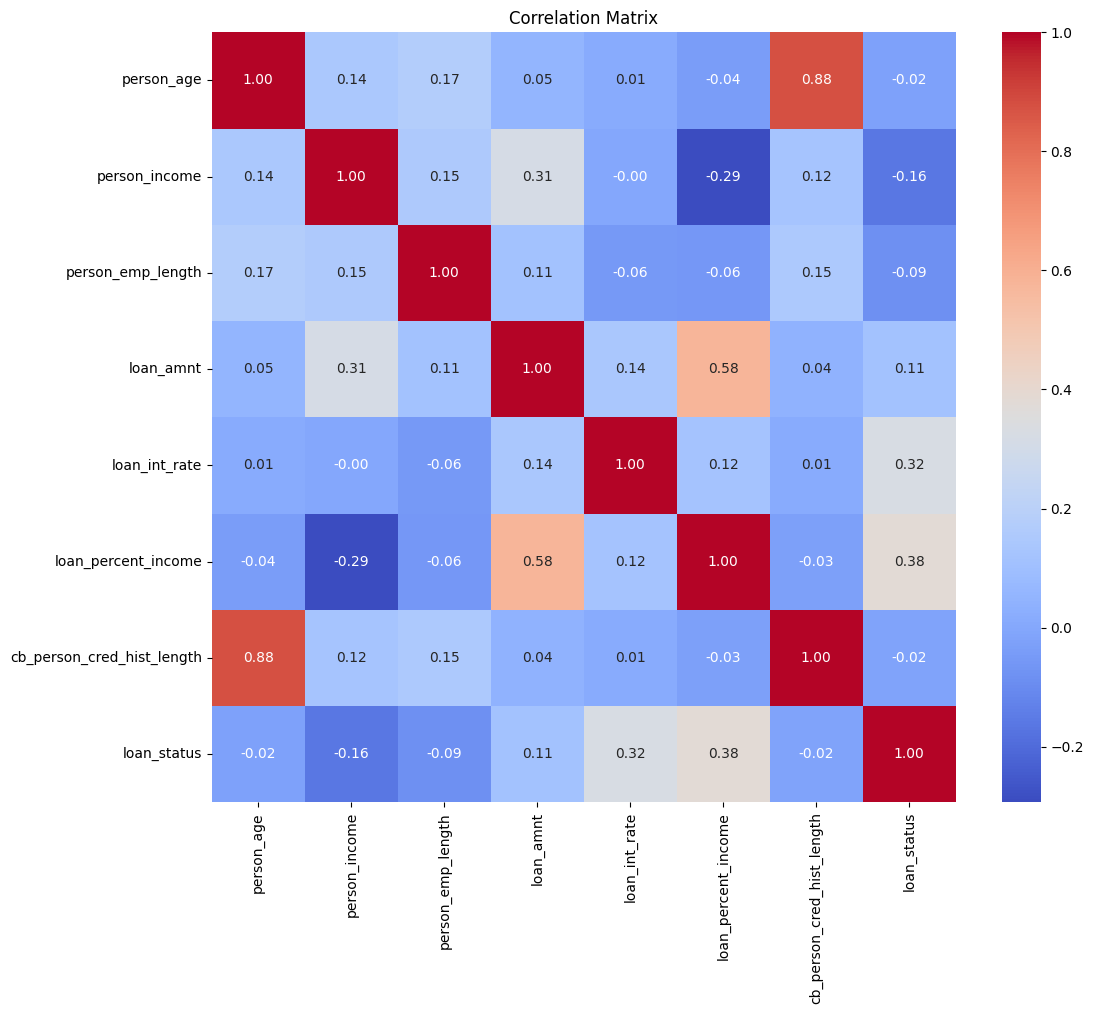

In [7]:
# We get the numeric columns for the correlation matrix, excluding the target variable
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_cols]

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

As we can see there are not many strong correlations between the dataset features but we can highlight:

- **Strong positive correlation between person_age and cb_person_cred_hist_length (0.88)**: This makes sense since the older the person is, the longer their credit history is likely to be.

- **Moderate positive correlation between loan_percent_income and loan_amnt (0.58)**: This also makes sense since the higher the loan amount, the higher the percentage of income that is likely to be allocated to paying that loan.

- **Relatively low positive correlation of loan_status (target) with loan_int_rate (0.32) and loan_percent_income (0.38)**: It makes sense since the higher the interest rate and the higher the percentage of income allocated to the loan, the more likely it is to default.

To see the correlation between the target variable and its most correlated features we can use boxplots.

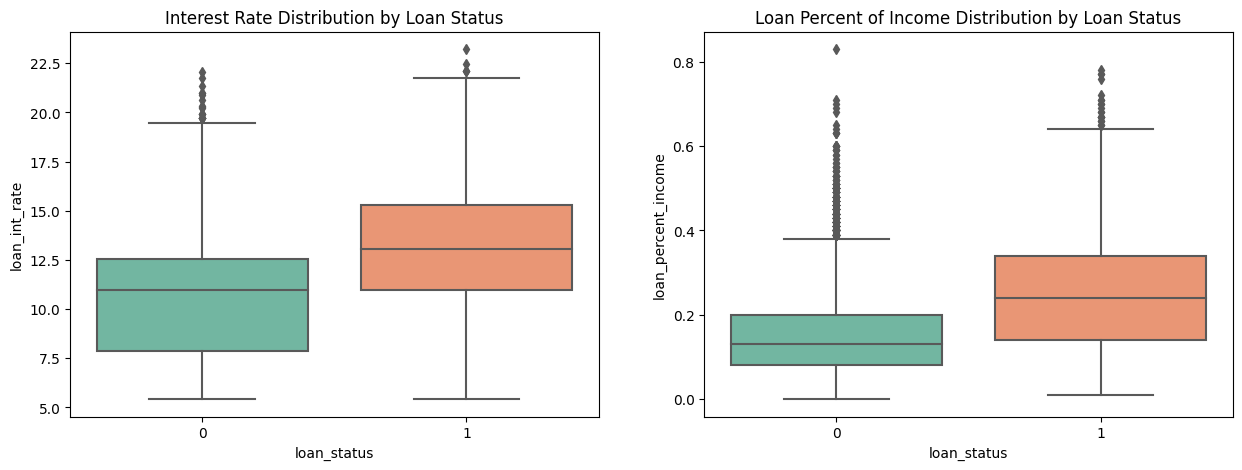

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Intrest rate distribution by loan status
sns.boxplot(x='loan_status', y='loan_int_rate', data=df, ax=axes[0])
axes[0].set_title('Interest Rate Distribution by Loan Status')

# Loan percentage of income distribution by loan status
sns.boxplot(x='loan_status', y='loan_percent_income', data=df, ax=axes[1])
axes[1].set_title('Loan Percent of Income Distribution by Loan Status')

plt.show()


We can see a clear correlation between these two features and the target variable, which is consistent with our expectations. Higher interest rates and higher loan percentages of income are associated with a higher likelihood of default.

Now we can move on with the categorical variables.

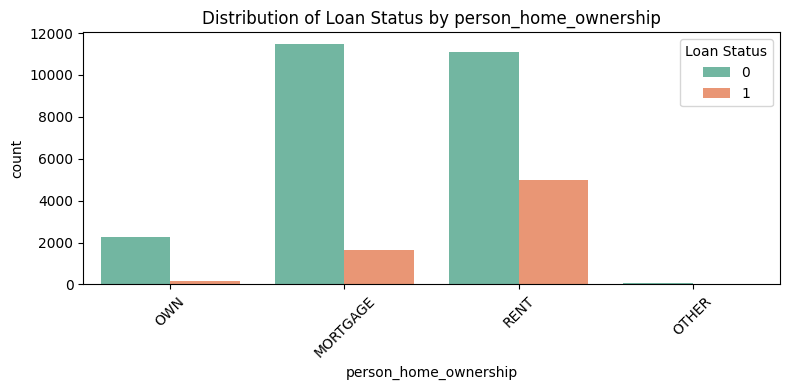

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(8, 4))
sns.countplot(x=categorical_cols[0], hue='loan_status', data=df)
plt.title(f'Distribution of Loan Status by {categorical_cols[0]}')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()


There is a clear relationship between the loan status and the home ownership status, having really low default rates on people that own their home, a higher default rate on people that have a mortgage and the highest default rate on people that rent their home.

NameError: name 'ticksplt' is not defined

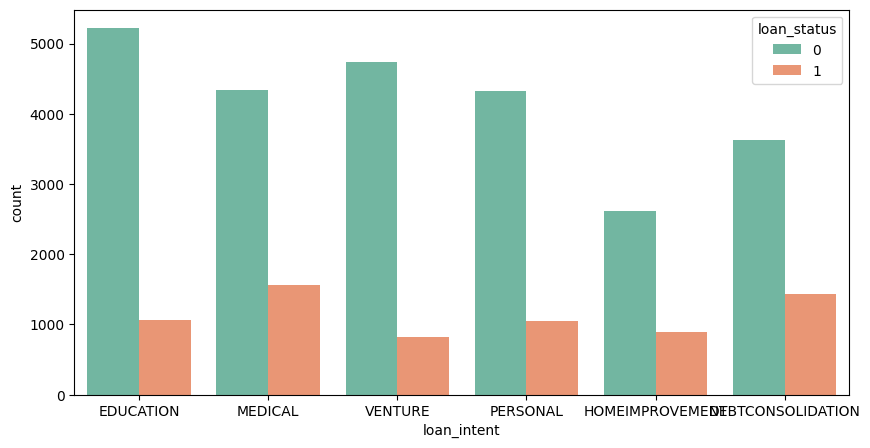

In [ ]:

# For the second categorical variable, we can add percentage annotations to the bars since it is harder to visually compare the heigts of the bars across categories.
x_col = categorical_cols[1]
group_counts = df.groupby(x_col).size() # Total occurrences of each category

plt.figure(figsize=(10, 5))
ax = sns.countplot(x=x_col, hue='loan_status', data=df)

all_categories = [t.get_text() for t in ax.get_xticklabels()] # Get the category labels from the x-axis

# Add annotations with percentages on top of the bars
for p in ax.patches: # Loop through each bar in the plot
    height = p.get_height() # Get the height of the bar (count of occurrences)
    category_idx = int(round(p.get_x() + p.get_width() / 2)) # Calculate the index of the category based on the x position of the bar
    all_categories = [t.get_text() for t in ax.get_xticklabels()] # Get the category labels from the x-axis ticks
    
    if category_idx < len(all_categories):# Check if the calculated index is within the range of category labels
        x_category = all_categories[category_idx]# Get the category label corresponding to the bar
        group_total = group_counts[x_category]# Get the total count for that category from the group counts
        
        percentage = f'{(100 * height / group_total):.1f}%'# Calculate the percentage of the bar height relative to the total count for that category
        
        ax.annotate(percentage, # Annotate the percentage on top of the bar
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    fontsize=11,
                    fontweight='bold')

plt.title(f'Loan Status Distribution within {x_col}')
plt.ylim(0, df[x_col].value_counts().max() * 0.95) 
plt.show()

As we can see all categories on loan_intent distributions range from ~70% to ~85% 

In [ ]:
As we can see all categories on loan_intent distributions range from ~70% to ~85% of non-defaults